<a href="https://colab.research.google.com/github/surname0990/CEX-and-DEX-bot-arbitrage/blob/main/4Cex_arbitrage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pybit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 3.0 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 106 kB 32.6 MB/s 
  Created wheel for pybit: filename=pybit-2.4.1-py2.py3-none-any.whl size=48207 sha256=33310413af793f52af6ebd4cfdb60748378bf372d42109d4d631be5a5c35aaa2
  Stored in directory: /root/.cache/pip/wheels/80/ca/f2/63bafd2858cefce6e175b7b2eab77ac90436b910d944248805
Successfully built pybit


In [4]:
pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 292 kB 10.3 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
     |████████████████████████████████| 749 kB 43.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [97]:
from binance.client import Client
import requests , pprint
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from pybit import spot
from datetime import datetime

In [98]:
client = Client()
binance_df = pd.DataFrame(client.get_historical_klines("BTCUSDT", "1m",))
binance_df = binance_df.iloc[:,:6]
binance_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
binance_df = binance_df.set_index('Time')
binance_df.index = pd.to_datetime(binance_df.index, unit='ms')
binance_df = binance_df.astype(float) 

In [99]:
session = spot.HTTP(endpoint="https://api.bybit.com")
kline = session.query_kline(symbol="BTCUSDT" ,interval="1m")
kline = kline['result']
bybit_df = pd.DataFrame(kline)
bybit_df = bybit_df.iloc[:,:6]
bybit_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
bybit_df = bybit_df.set_index('Time')
bybit_df.index = pd.to_datetime(bybit_df.index, unit='ms')
bybit_df = bybit_df.astype(float)

In [104]:
url_1 = 'https://www.okex.com'
okex_df = pd.DataFrame((requests.get(url_1+'/api/v5/market/history-candles?bar=1m&instId=BTC-USDT-SWAP').json())['data'])
okex_df = okex_df.iloc[:,:6]
okex_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
okex_df = okex_df.set_index('Time')
okex_df.index = pd.to_datetime(okex_df.index, unit='ms')
okex_df = okex_df.astype(float)  

In [106]:
url_2 = 'https://api.huobi.pro'
huobi_df = pd.DataFrame((requests.get(url_2+"/market/history/kline?period=1min&size=1000&symbol=btcusdt").json())['data'])
huobi_df = huobi_df.iloc[:,:6]
huobi_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
huobi_df = huobi_df.set_index('Time')
huobi_df.index = pd.to_datetime(huobi_df.index, unit='s')
huobi_df = huobi_df.astype(float)   

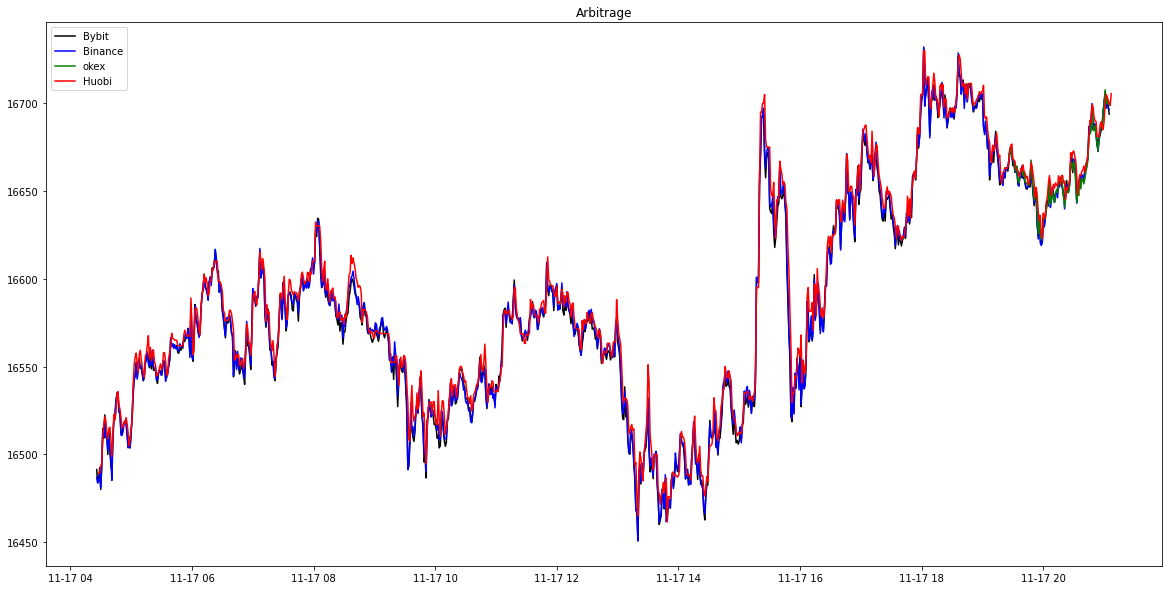

In [107]:
plt.figure(figsize=(20, 10))
plt.plot(bybit_df['Close'],label='Bybit', color='black')
plt.plot(binance_df['Close'], label='Binance', color='blue')
plt.plot(okex_df['Close'], label='okex', color='green')
plt.plot(huobi_df['Close'], label='Huobi',color='red')
plt.title("Arbitrage")
plt.legend(['Bybit', 'Binance','okex','Huobi'])

In [88]:
 m\tokens = requests.get("https://api.pancakeswap.info//api/v2/tokens").json()
pprint.pprint(tokens)

{'error': {'code': 500,
           'message': 'GraphQL error: panic processing query: only derived '
                      'fields can lead to multiple children here'}}
